In [ ]:
# LendSmart Credit Risk Analysis

The dataset contains 2,500 loan application records from 2022 to 2024, all without null values. The variables cover financial, demographic, and credit aspects of the applicant. The target variable (loan_status) indicates whether the loan was repaid or defaulted on, with a default rate of 26.56%.


The data shows that loan applicants have highly varied financial profiles. For example, the loan amount requested ranges from $5,000 to $500,000, with an average of approximately $155,000. Annual income also varies considerably, from $15,000 to nearly $150,000. Most customers have a credit score of 682, but there are also individuals with very low scores. Indicators such as credit utilization, job stability score, and payment history score reflect that many customers have good credit history, although there are extreme values ​​that could indicate risk. Furthermore, the debt-to-income ratio shows that some applicants have a high debt burden relative to their income. Variables such as savings ratio, asset value, and age also show significant differences between individuals. All of this indicates that LendSmart needs an analysis model capable of accurately distinguishing between reliable and unreliable customers.

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("../datos/credit_risk_data-1.csv")
df.head()

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [3]:
display(df.head())
display(df.describe())
display(df.info())

,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability,loan_status
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,6.023200,0.265600
std,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,3.205397,0.441741
min,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,0.000000,0.000000
25%,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,3.600000,0.000000
50%,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,5.900000,0.000000
75%,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,8.400000,1.000000
max,500000.000000,149929.960000,19.300000,0.999000,850.000000,0.998000,1.000000,11.000000,0.979000,0.893000,1000000.000000,75.000000,16.400000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

None

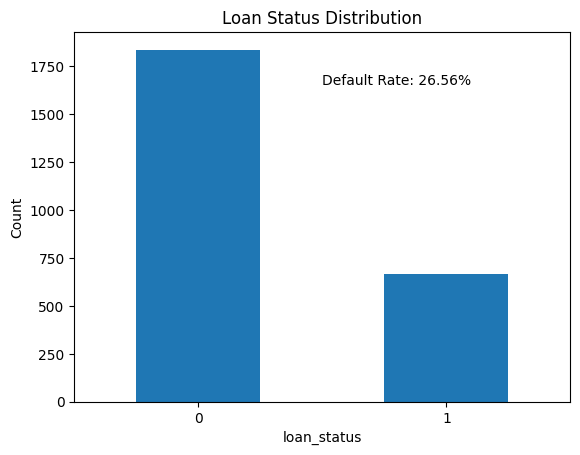

In [4]:
default_rate=(len(df[df["loan_status"]==1])/len(df))*100
plt.figure()
df["loan_status"].value_counts().plot(kind="bar")
plt.title("Loan Status Distribution")  
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.annotate(f'Default Rate: {default_rate:.2f}%', xy=(0.5, max(df["loan_status"].value_counts())*0.9)),
plt.show() 


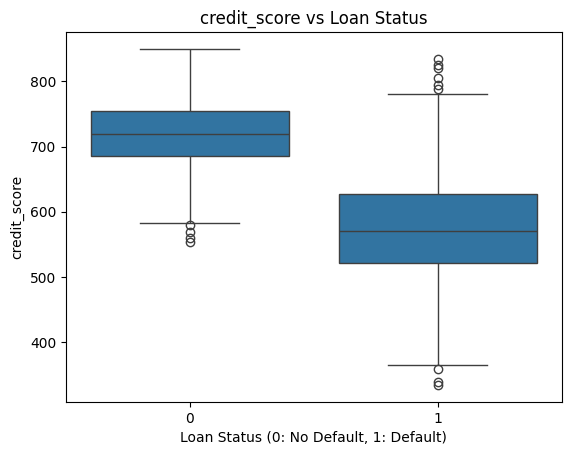

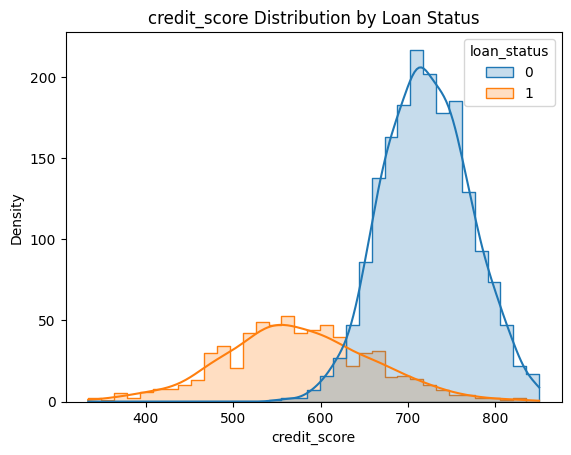

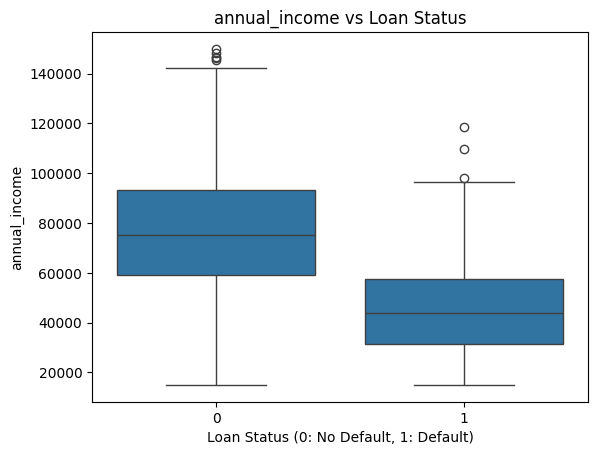

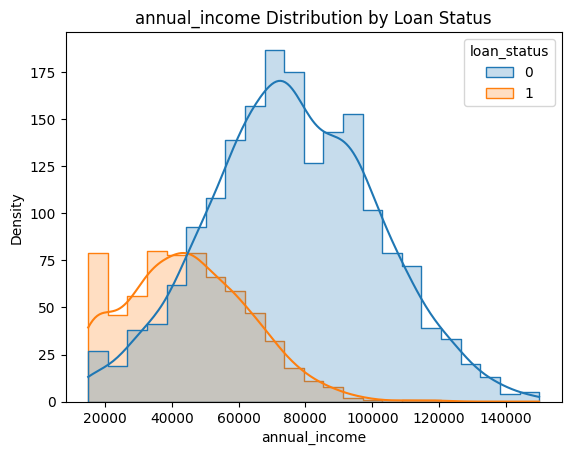

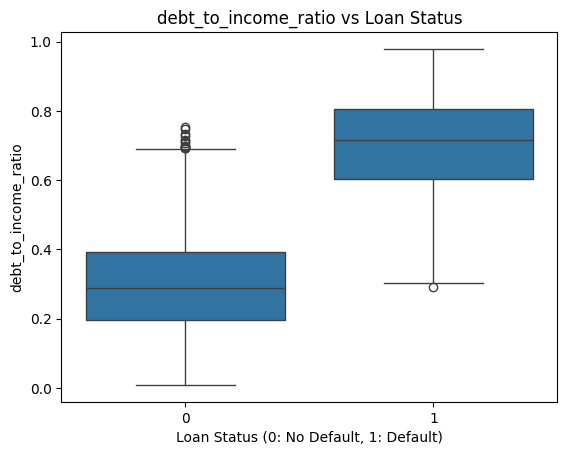

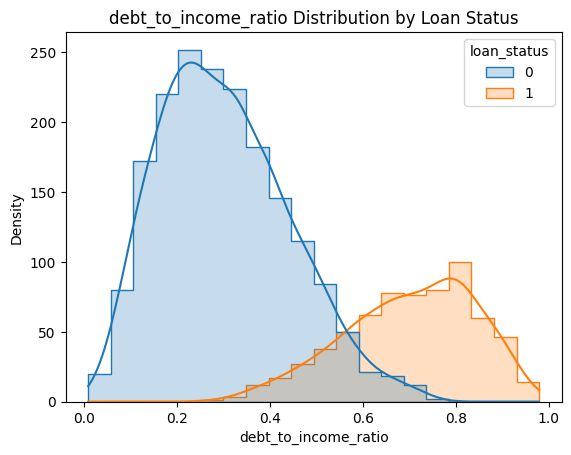

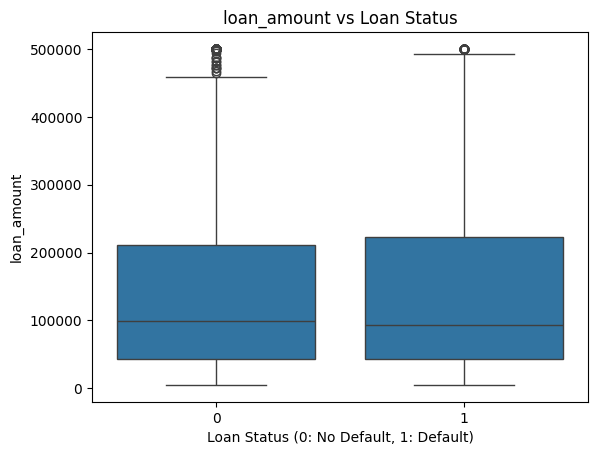

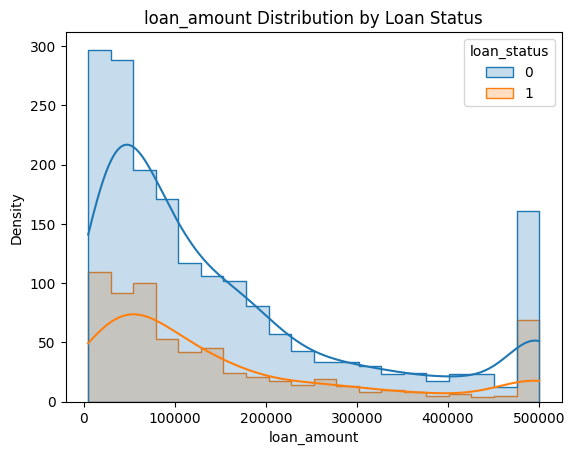

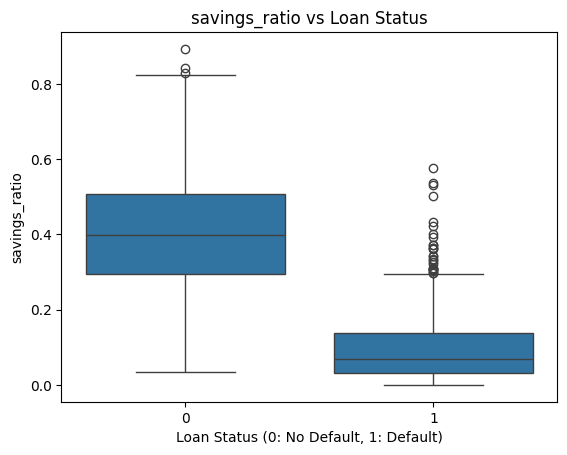

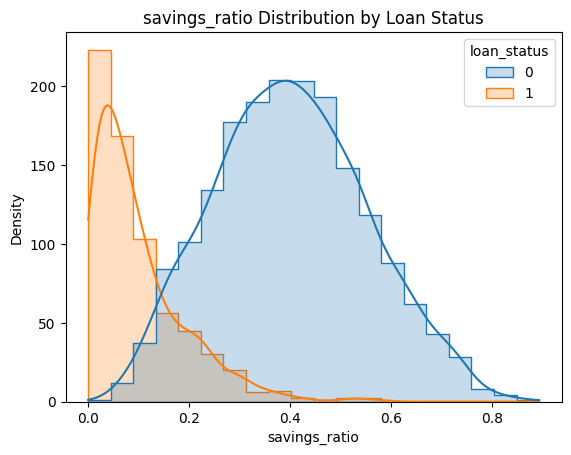

In [5]:
key_predicors=["credit_score", "annual_income", "debt_to_income_ratio", "loan_amount", "savings_ratio"]
for predictor in key_predicors:
    # Boxplots
    plt.figure()
    sns.boxplot(x="loan_status", y=predictor, data=df)
    plt.title(f"{predictor} vs Loan Status")
    plt.xlabel("Loan Status (0: No Default, 1: Default)")
    plt.ylabel(predictor)
    plt.show()
    # Histograms
    plt.figure()    
    sns.histplot(data=df, x=predictor, hue="loan_status", kde=True, element="step", stat="count")
    plt.title(f"{predictor} Distribution by Loan Status")
    plt.xlabel(predictor)
    plt.ylabel("Density")
    plt.show()


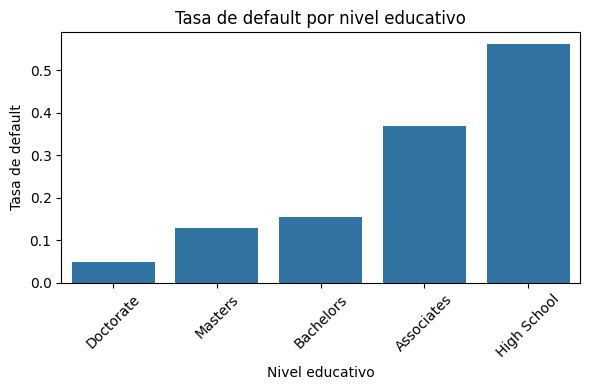

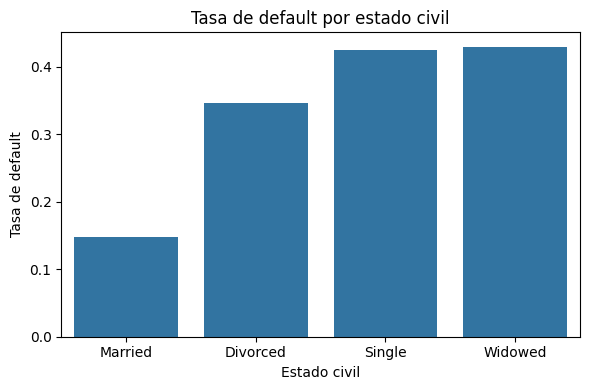

In [6]:
edu_default = df.groupby('education_level')['loan_status'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=edu_default.index, y=edu_default.values)
plt.title('Tasa de default por nivel educativo')
plt.ylabel('Tasa de default')
plt.xlabel('Nivel educativo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


marital_default = df.groupby('marital_status')['loan_status'].mean().sort_values()

plt.figure(figsize=(6,4))
sns.barplot(x=marital_default.index, y=marital_default.values)
plt.title('Tasa de default por estado civil')
plt.ylabel('Tasa de default')
plt.xlabel('Estado civil')
plt.tight_layout()
plt.show()
